In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor  
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.metrics import accuracy_score, classification_report,precision_score,recall_score,f1_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")

# Problem Statement : Optimize the Loan eligibility process

Your client is a meal delivery company which operates in multiple cities. They have various fulfillment centers in these cities for dispatching meal orders to their customers. The client wants you to help these centers with demand forecasting for upcoming weeks so that these centers will plan the stock of raw materials accordingly.

The replenishment of majority of raw materials is done on weekly basis and since the raw material is perishable, the procurement planning is of utmost importance. Secondly, staffing of the centers is also one area wherein accurate demand forecasts are really helpful. Given the following information, the task is to predict the demand for the next 10 weeks (Weeks: 146-155) for the center-meal combinations in the test set:  

- Historical data of demand for a product-center combination (Weeks: 1 to 145)
- Product(Meal) features such as category, sub-category, current price and discount
- Information for fulfillment center like center area, city information etc.

## About the dataset
Variable  &  	Definition
- id	- Unique ID
- week	- Week No
- center_id	- Unique ID for fulfillment center
- meal_id	- Unique ID for Meal
- checkout_price	- Final price including discount, taxes & delivery charges
- base_price	- Base price of the meal
- emailer_for_promotion	- Emailer sent for promotion of meal
- homepage_featured	- Meal featured at homepage
- num_orders	(Target) - Orders Count

## Load Datasets

In [2]:
train_data = pd.read_csv("C:\\Users\\Acer\\Downloads\\train_GzS76OK\\train.csv")
fulfilment_center_data = pd.read_csv("C:\\Users\\Acer\\Downloads\\train_GzS76OK\\fulfilment_center_info.csv")
meal_data= pd.read_csv("C:\\Users\\Acer\\Downloads\\train_GzS76OK\\meal_info.csv")

## Data Exploration

### train_data

In [3]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
train_data.size      #--->total number of datas.

4108932

In [5]:
train_data.shape        #--->No. of raws & columns.

(456548, 9)

In [6]:
train_data.info()     #--->details about numerical & categorical columns.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


- Only numerical columns are present in test data.

In [7]:
train_data.describe()        #--->descriptive statistics

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,82.105796,2024.337458,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,45.975046,547.420920,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,10.000000,1062.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,43.000000,1558.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,76.000000,1993.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,110.000000,2539.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,186.000000,2956.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


### fulfilment_center_data

In [8]:
fulfilment_center_data.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [9]:
fulfilment_center_data.size

385

In [10]:
fulfilment_center_data.shape

(77, 5)

In [11]:
fulfilment_center_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


In [12]:
fulfilment_center_data.describe()

,center_id,city_code,region_code,op_area
count,77.000000,77.000000,77.000000,77.000000
mean,83.142857,600.662338,56.493506,3.985714
std,46.090219,66.720274,18.126473,1.106406
min,10.000000,456.000000,23.000000,0.900000
25%,50.000000,553.000000,34.000000,3.500000
50%,77.000000,596.000000,56.000000,3.900000
75%,110.000000,651.000000,77.000000,4.400000
max,186.000000,713.000000,93.000000,7.000000


### meal_data

In [13]:
meal_data.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [14]:
meal_data.size

153

In [15]:
meal_data.shape

(51, 3)

In [16]:
meal_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [17]:
meal_data.describe()

,meal_id
count,51.000000
mean,2013.921569
std,553.633555
min,1062.000000
25%,1550.500000
50%,1971.000000
75%,2516.500000
max,2956.000000


----

In [18]:
#Checking Duplicate values in rows

train_data.duplicated().sum()

0

In [19]:
#Checking Duplicate values in columns

train_data.columns.duplicated().sum()

0

In [20]:
#Checking Missing values

train_data.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64

- Neither missing values nor duplicate values present in the dataset.

In [21]:
# droping column "id","center_id","meal_id"
train_data.drop(["id","center_id","meal_id"],axis=1, inplace = True)

In [22]:
train_data.head(3)

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1,136.83,152.29,0,0,177
1,1,136.83,135.83,0,0,270
2,1,134.86,135.86,0,0,189


In [23]:
train_data.columns.tolist()

['week',
 'checkout_price',
 'base_price',
 'emailer_for_promotion',
 'homepage_featured',
 'num_orders']

# Exploratory Data Analysis(EDA)

# 1.Univariate Analysis

### Check Histograms of Numerical columns for Data imputation

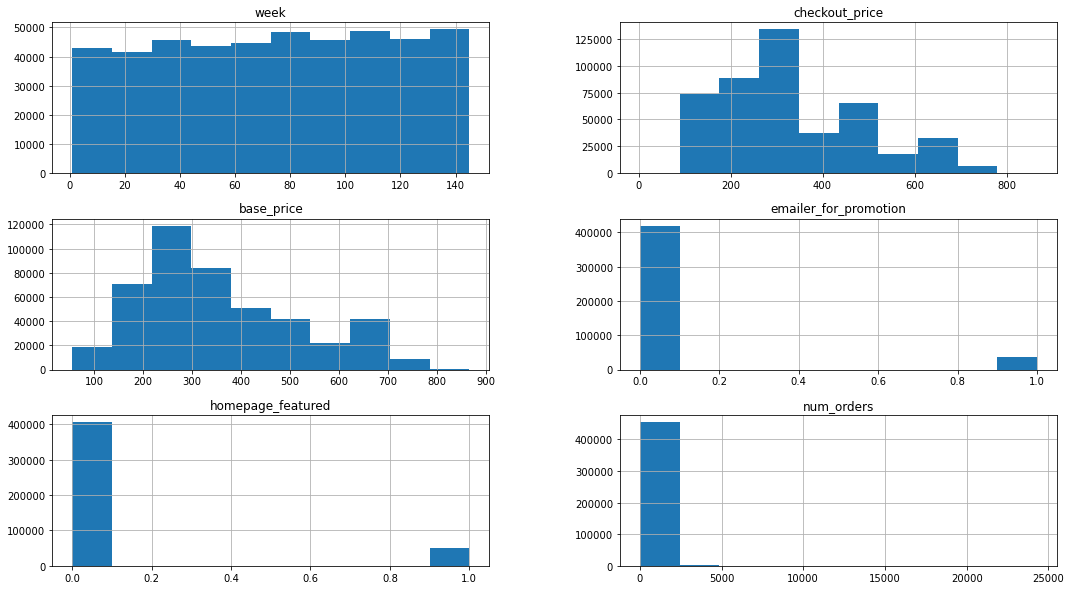

In [24]:
# Histogram
train_data.hist(bins=10, figsize = (18,10))
plt.show()

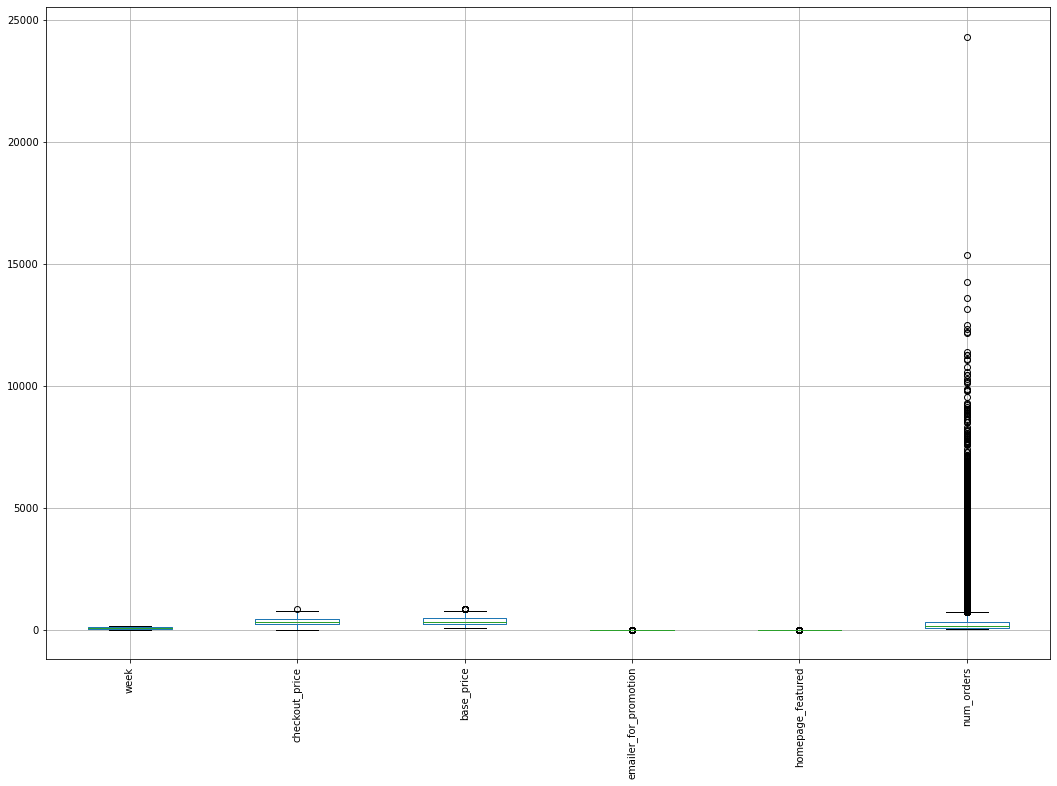

In [25]:
#Box plot
train_data.boxplot(figsize = (18,12))
plt.xticks(rotation = 90)
plt.show()

- Outliers are present in columns'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders'.
- We will remove outliers except from the column 'num_orders'.since it doesn't make sence.

## 2.Bivariate Analysis

In [26]:
cols = train_data[["checkout_price", "base_price" , "emailer_for_promotion", "homepage_featured", "num_orders"]]

In [27]:

# Function to plot scatter plots in a subplot.
def plot_scatter_for_df(datafrm, rows, cols, graph_type):
  plt.figure(figsize = (15,15))
  plt.suptitle('Bivariate plots')  
  plot_position = 1     # variable introduced to make positioning
  for col in datafrm.columns:
    plt.subplot(rows, cols, plot_position)
    sns.scatterplot(data= datafrm ,x = col, y= "num_orders")
    plt.xticks(rotation=45)
    plt.title('Bivariate Plot: '+col+' vs. nu_orders')
    plt.xlabel(col)
    plt.ylabel('num_orders')
    plot_position += 1  # increments plot_position to fix the plot position

  plt.tight_layout()    
  plt.show()

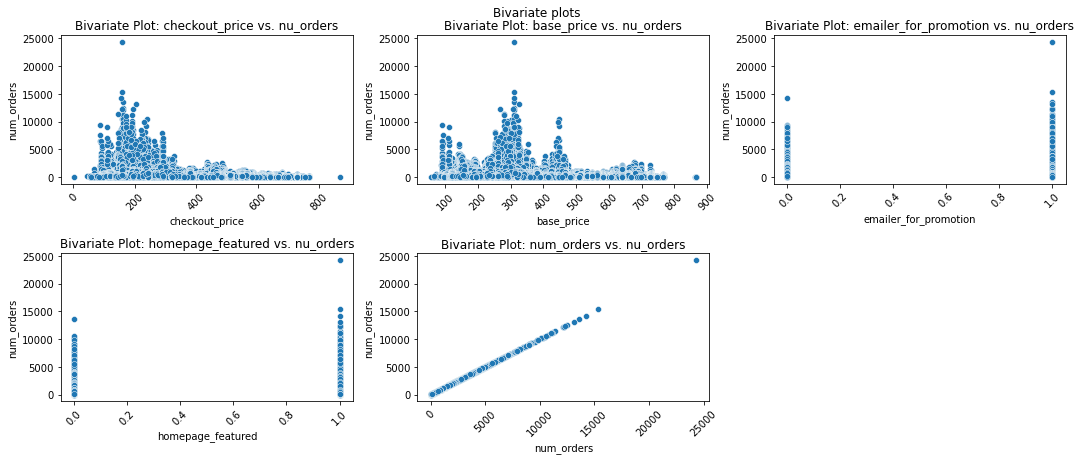

In [28]:
plot_scatter_for_df(cols,5,3,'scatter')

## 3.Multivariate Analysis

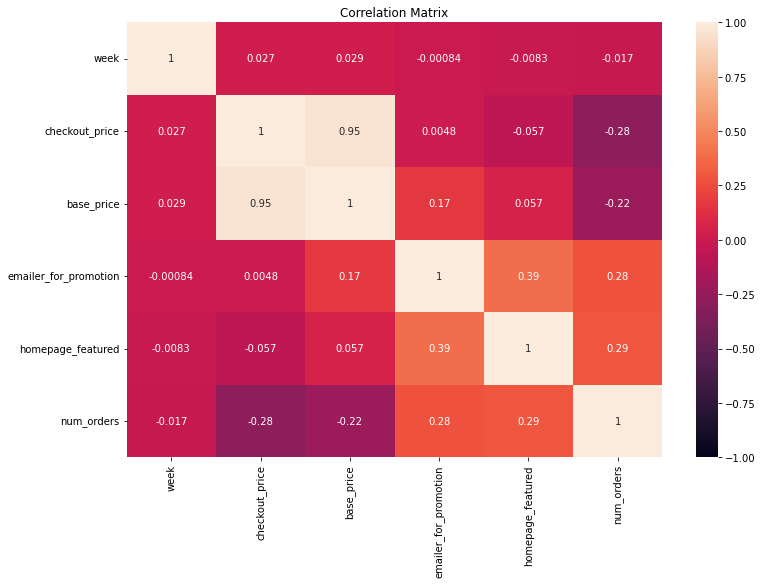

In [29]:
#plotting correlation matrix of numerical variables - Heat map
corr_matrix = train_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

- Here checkout_price & base_price are having strong positive correlation.So we can choose only one for further analysis.

# Data Preprocessing

## Outlier Handling

In [30]:
otlr_cols = train_data.columns.tolist()

In [31]:
print (otlr_cols)

['week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [32]:
otlr_cols.remove("num_orders")

In [33]:
def remove_outliers (train_data,column_name):
    q1 = train_data[column_name].quantile(0.25)
    q3 = train_data[column_name].quantile(0.75)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    train_data[column_name] =   train_data[column_name].clip(upper = upper_bound)
    train_data[column_name] =   train_data[column_name].clip(lower = lower_bound)
    return train_data[column_name]
for col in otlr_cols:
    train_data[col] = remove_outliers(train_data,col) 

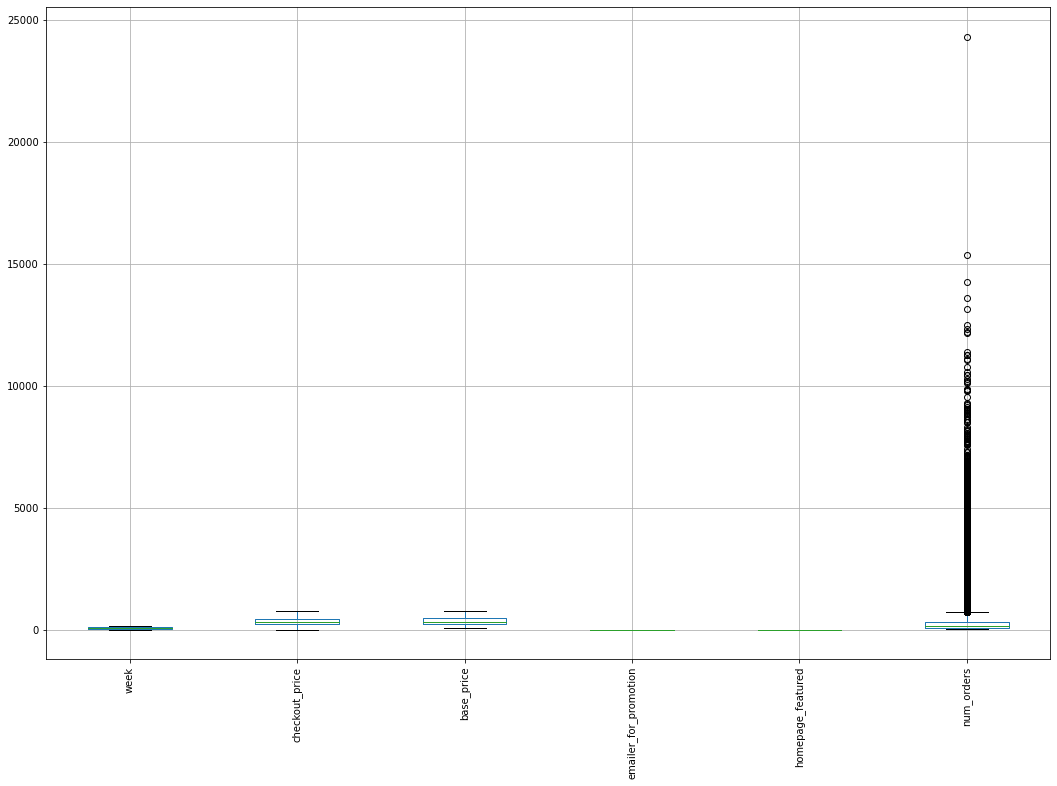

In [34]:
train_data.boxplot(figsize = (18,12))
plt.xticks(rotation = 90)
plt.show()

- Removing outliers from column 'num_orders' doesn't make sence.

## Feature Scaling Numerical Variables

In [35]:
min_max_scaler = MinMaxScaler()

In [36]:
cols = ['week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']

In [37]:
train_data[cols]=min_max_scaler.fit_transform(train_data[cols])

In [38]:
train_data.head(3)

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,0.0,0.174597,0.133421,0.0,0.0,0.006753
1,0.0,0.174597,0.110766,0.0,0.0,0.010582
2,0.0,0.172027,0.110808,0.0,0.0,0.007247


In [39]:
train_data.drop('base_price',axis=1,inplace =True)

In [40]:
train_data.head()

,week,checkout_price,emailer_for_promotion,homepage_featured,num_orders
0,0.0,0.174597,0.0,0.0,0.006753
1,0.0,0.174597,0.0,0.0,0.010582
2,0.0,0.172027,0.0,0.0,0.007247
3,0.0,0.438945,0.0,0.0,0.001688
4,0.0,0.313729,0.0,0.0,0.001112


## Train test split

In [41]:
y = train_data['num_orders']
X = train_data.drop("num_orders",axis = 1)

In [42]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 42)

# Model Bulding & Evaluation

## 1. Linear Regression

In [43]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [44]:
lr_pred = lr_model.predict(X_test)

In [45]:
mse = mean_squared_error( y_test,lr_pred)
r2 = r2_score(y_test,lr_pred)
print("Mean Squared Error" , mse)
print("R2 score :", r2)

Mean Squared Error 0.0002378064248206159
R2 score : 0.08046046165995158


## 2. Decision Tree Regressor

In [46]:
dt_regressor_model = DecisionTreeRegressor(random_state = 5) 
dt_regressor_model.fit(X_train, y_train) 

DecisionTreeRegressor(random_state=5)

In [47]:
dt_regressor_pred = dt_regressor_model.predict(X_test)

In [48]:
mse = mean_squared_error( y_test,dt_regressor_pred)
r2 = r2_score(y_test,dt_regressor_pred)
print("Mean Squared Error" , mse)
print("R2 score :", r2)

Mean Squared Error 0.00018804732950370288
R2 score : 0.2728667667900476


- Comparing these two,minimum error & maximum R2 Score comes for Decision Tree Regressor

## Hyper Parameter Tuning

In [49]:
# Define the parameter grid to tune the hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dtree_reg = DecisionTreeRegressor(random_state=42) # Initialize a decision tree regressor
grid_search = GridSearchCV(estimator=dtree_reg, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_dtree_reg = grid_search.best_estimator_ # Get the best estimator from the grid search
y_pred = best_dtree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")
print(f"Test RMSE: {rmse}")


Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 4, 'min_samples_split': 10}
Test RMSE: 0.012809120024473084


In [50]:
dt_regressor_model = DecisionTreeRegressor(max_depth=20, min_samples_leaf= 4, min_samples_split= 10,random_state = 0) 
dt_regressor_model.fit(X_train, y_train) 
dt_regressor_pred = dt_regressor_model.predict(X_test)
mse = mean_squared_error( y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print("Mean Squared Error" , mse)
print("R2 score :", r2)

Mean Squared Error 0.00016407355580135734
R2 score : 0.36556751202496984


# Test data Preprocessing

In [51]:
test_data = pd.read_csv("C:\\Users\\Acer\\Downloads\\test_QoiMO9B.csv")

In [52]:
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [53]:
test_data.size

260584

In [54]:
test_data.shape

(32573, 8)

In [55]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


In [56]:
test_data.describe()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
count,3.257300e+04,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000,32573.000000
mean,1.248476e+06,150.477819,81.901728,2032.067909,341.854440,356.493615,0.066435,0.081356
std,1.441580e+05,2.864072,45.950455,547.199004,153.893886,155.150101,0.249045,0.273385
min,1.000085e+06,146.000000,10.000000,1062.000000,67.900000,89.240000,0.000000,0.000000
25%,1.123969e+06,148.000000,43.000000,1558.000000,214.430000,243.500000,0.000000,0.000000
50%,1.247296e+06,150.000000,76.000000,1993.000000,320.130000,321.130000,0.000000,0.000000
75%,1.372971e+06,153.000000,110.000000,2569.000000,446.230000,455.930000,0.000000,0.000000
max,1.499996e+06,155.000000,186.000000,2956.000000,1113.620000,1112.620000,1.000000,1.000000


In [57]:
#Checking Duplicate values in rows

test_data.duplicated().sum()

0

In [58]:
#Checking Duplicate values in columns

test_data.columns.duplicated().sum()

0

In [59]:
#Checking Missing values

test_data.isna().sum()

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
dtype: int64

In [60]:
# droping column "id","center_id","meal_id"
test_data.drop(["id","center_id","meal_id"],axis=1, inplace = True)

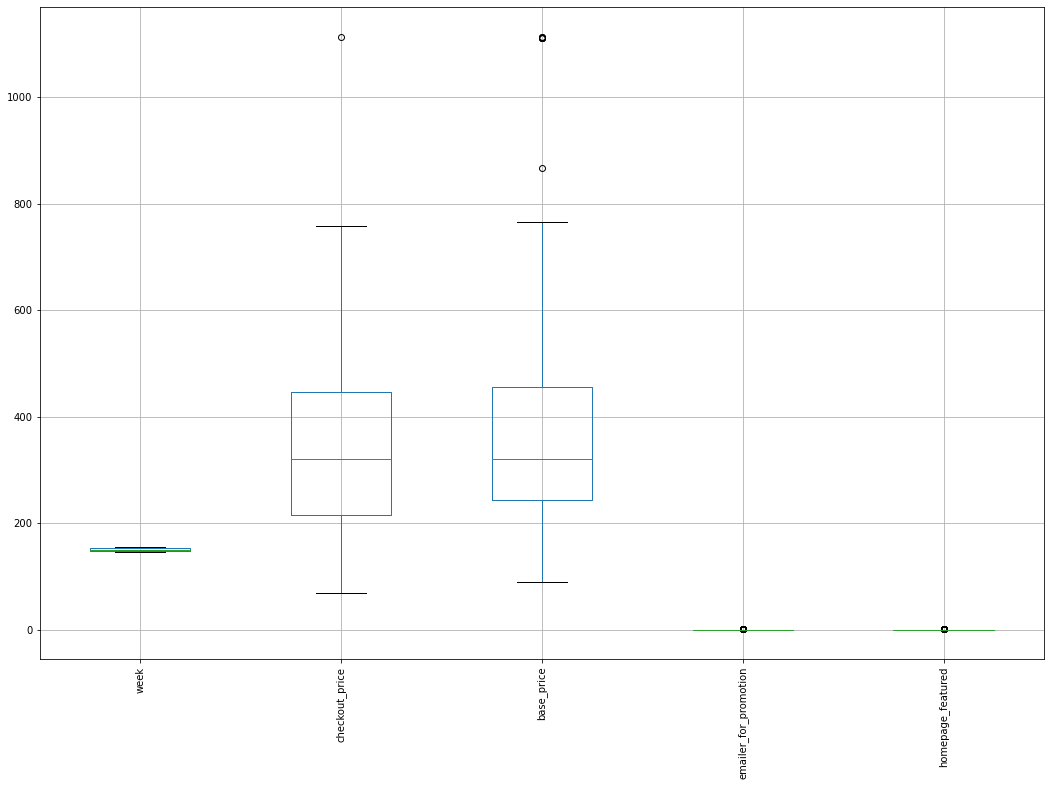

In [61]:
#Box plot
test_data.boxplot(figsize = (18,12))
plt.xticks(rotation = 90)
plt.show()

In [62]:
def remove_outliers (test_data,column_name):
    q1 = test_data[column_name].quantile(0.25)
    q3 = test_data[column_name].quantile(0.75)
    IQR = q3 - q1
    upper_bound = q3 + 1.5 * IQR
    lower_bound = q1 - 1.5 * IQR
    test_data[column_name] =   test_data[column_name].clip(upper = upper_bound)
    test_data[column_name] =   test_data[column_name].clip(lower = lower_bound)
    return test_data[column_name]
for col in otlr_cols:
    test_data[col] = remove_outliers(test_data,col) 

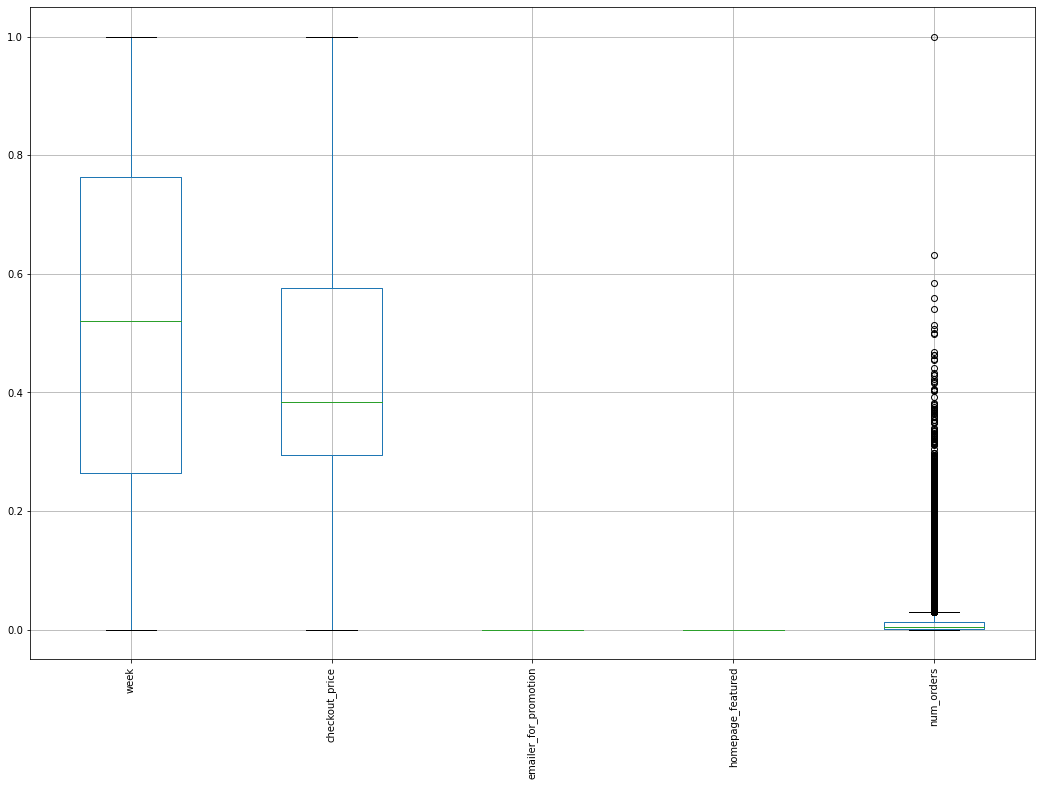

In [63]:
train_data.boxplot(figsize = (18,12))
plt.xticks(rotation = 90)
plt.show()

## Feature Scaling Numerical Variables

In [64]:
min_max_scaler = MinMaxScaler()

In [65]:
cols = ['week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured']
test_data[cols]=min_max_scaler.fit_transform(test_data[cols])

In [66]:
test_data.head(3)

,week,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,0.0,0.124251,0.101950,0.0,0.0
1,0.0,0.127006,0.101950,0.0,0.0
2,0.0,0.122915,0.101994,0.0,0.0


## Prediction

In [67]:
# droping column "base_price"
test_data.drop(["base_price"],axis=1, inplace = True)

In [68]:
test_data["num_orders"] =dt_regressor_model.predict(test_data)

In [69]:
data = pd.read_csv("C:\\Users\\Acer\\Downloads\\test_QoiMO9B.csv")
id_data = data["id"]

In [70]:
test_data_with_target = test_data["num_orders"]

In [71]:
test_data_pred = pd.concat([id_data,test_data_with_target],axis=1)

In [72]:
test_data_pred.to_csv("C:\\Users\\Acer\\Downloads\\test_data_food_prediction.csv",index=False)